In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import faceted as faceted
import xarray as xr
import numpy as np

sns.set(font_scale=1.2)
sns.set_palette('hls', 4)
sns.set_style('ticks')

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 10,
    "text.latex.preamble": "\n".join([r'\usepackage{amsmath}'])
})    

In [2]:
ds = xr.open_dataset("../data/DNS/plume_centerline.nc")

In [3]:
def MTT(z):
    return 31.3*(z+1.1)**(-5/3)

a,b,c,d = [ -2.06190316, -14.70771946,   0.01750799,   0.56364314]

def b_empirical(z):
    return MTT(z) + (a + b*(1 - np.exp(-z/c)))*np.exp(-z/d)

def db_dz_empirical(z):
    return (-(5/3)*31.3*(z+1.1)**(-8/3) 
            -(1/d)*(a + b*(1 - np.exp(-z/c)))*np.exp(-z/d)
            + (b/c)*np.exp(-z/c)*np.exp(-z/d))

def l_empirical_hat(z):
        return -b_empirical(z)/db_dz_empirical(z)

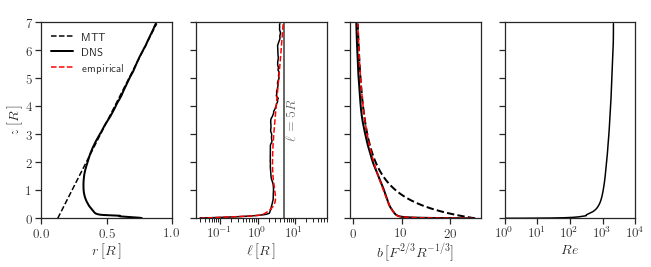

In [26]:
z = ds.z 
l = 1/ds.epsilon

fig, axis = faceted.faceted(1,4, aspect=1.5, sharey=True, left_pad=.5,
                            bottom_pad=.6,
                            sharex=False, width=9.0)

z_v = -1.14
alpha = 0.0908
axis[0].plot(6*alpha/5*(z - z_v), z, linestyle='dashed', color='black', label=r'MTT')
ds.R.plot(label=r'DNS', color='black', linewidth=2.0, y='z', ax=axis[0])
axis[0].plot([-9e9, -8e9], [-9e9, -8e9], color='red', 
             label='empirical', linestyle='dashed')
axis[0].legend(loc='upper left', frameon=False, fontsize=11)
axis[0].set_xlim([0, 1])

for ax in axis:
    ax.set_title(" ")
    ax.set_ylabel(" ")

axis[0].set_ylim([0,7])
axis[0].set_ylabel(r'$z \, [R\,]$')
axis[0].set_xlabel(r'$r \, [R\,]$')
l.plot(y='z', ax=axis[1], color='black') 
axis[1].axvline(x=5, linewidth=2.0, color='dimgrey', label='$5\,R$')
axis[1].text(8.7, 3.5, r'$\ell = 5R$', horizontalalignment='center', 
            verticalalignment='center', rotation='90', color='dimgrey',
            size=14)
axis[1].set_xscale("log")
axis[1].set_ylabel(' ')
axis[1].set_ylim([0, 7
                 ])
axis[1].set_xlim([None, 70])
axis[1].set_title(" ")
axis[1].plot(l_empirical_hat(z), z, color='red', linestyle='dashed')
axis[1].set_xlabel(r'$\ell \, [R\,]$')

ds.b_avg.plot(ax=axis[2], color='black', linewidth=2.0, y='z')
axis[2].plot(ds.b_theory, ds.z, color='black', linestyle='dashed', 
             linewidth=2.0)
axis[2].set_xlabel("$b \, [F^{2/3}R^{-1/3}]$")
axis[2].plot(b_empirical(z), z, color='red', label='empirical', linestyle='dashed')
axis[2].set_title(" ")
axis[2].set_ylabel(" ")

Re_local = ds.w_avg*ds.R*1000
Re_local.plot(ax=axis[3], y='z', color='black')
axis[3].set_xscale('log')
axis[3].set_xlim([1,10000])
axis[3].set_xticks([1, 10, 100, 1000, 10000])
axis[3].set_xlabel("$Re$")
axis[3].set_ylabel(" ")
axis[3].set_title("")